# Saber Hacer Producto – Spotify Top 50

---

## Importar librerías básicas

In [7]:
# 1. Importa pandas, numpy, matplotlib.pyplot y seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carga del DataFrame

In [27]:
# 2. Cargar los datos a un dataframe para su revisión.
dfCanciones=pd.read_csv('top50.csv', encoding='latin-1')
# 3. Mostrar las columnas del dataframe.
dfCanciones.columns.tolist()
# 4. Mostrar las dimensiones del dataframe (50,14)
print("Filas y columnas: ", dfCanciones.shape)
# 5. Mostrar las estadísticas descriptivas.
dfCanciones.describe()
# 6. Mostrar la información del DataFrame.
dfCanciones.info()
# 7. Muestra el tipo de datos que almacena cada columna.
dfCanciones.dtypes

Filas y columnas:  (50, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


Unnamed: 0           int64
Track.Name          object
Artist.Name         object
Genre               object
Beats.Per.Minute     int64
Energy               int64
Danceability         int64
Loudness..dB..       int64
Liveness             int64
Valence.             int64
Length.              int64
Acousticness..       int64
Speechiness.         int64
Popularity           int64
dtype: object

## Limpieza de datos

In [41]:
# 1. Genera una copia del DataFrame (De aqui en adelante, debes trabajar con la copia)
dfCopy = dfCanciones.copy()
# 2. Revisar si existen valores nulos
print("Valores nulos por columna: ", dfCopy.isnull().sum())
# 3. Revisar si hay registros duplicados
print("Registros duplicados: ", dfCopy.duplicated().any())
# 4. Elimina la columna 0.
dfCopy.drop(dfCopy.columns[0], axis=1, inplace=True)
# 5. Muestra nuevamente las dimensiones de dataframe (50,13)
print("Nuevas dimensiones del DataFrame: ", dfCopy.shape)
# 6. Elimina los registros duplicados (FALSE)
dfCopy.drop_duplicates(inplace=True)
print("Dimensiones finales:", dfCopy.shape)

Valores nulos por columna:  Unnamed: 0          0
Track.Name          0
Artist.Name         0
Genre               0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence.            0
Length.             0
Acousticness..      0
Speechiness.        0
Popularity          0
dtype: int64
Registros duplicados:  False
Nuevas dimensiones del DataFrame:  (50, 13)
Dimensiones finales: (50, 13)


## Análisis exploratorio

In [75]:
# 1. Mostrar los primeros registros
print(dfCopy.head())
# 2. Mostrar los últimos dos registros
print(dfCopy.tail(2))
# 3. Obtener el total de artista (únicos) sin duplicar.
print("Total de artistas únicos: ", dfCopy['Artist.Name'].nunique())
# 4. Obtener los valores unicos del Genero de la canción.
print("Géneros únicos:", dfCopy['Genre'].unique())
# 5. Mostrar el valor promedio del tiempo de la canción.
print("Promedio del tiempo de la canción:", dfCopy['Length.'].mean())
# 6. Mostrar el valor mayor del volumen de la canción.
print("Volumen máximo:", dfCopy['Loudness..dB..'].max())
# 7. Mostrar el valor minimo de la energia de la cancion.
print("Energía mínima:", dfCopy['Energy'].min())
# 8. Mostrar el promedio de cada columna numérica.
print("Promedio de columnas numéricas:\n", dfCopy.mean(numeric_only=True))
# 9. Artista con más canciones en el Top 50.
artista_mas_canciones = dfCopy['Artist.Name'].value_counts().idxmax()
cantidad = dfCopy['Artist.Name'].value_counts().max()
print(f"Artista con más canciones: {artista_mas_canciones} ({cantidad} canciones)")
# 10. Analiza Ed Sheeran es el más popular, responde SI o NO, con base a la popularidad.
ed_sheeran_pop = dfCopy[dfCopy['Artist.Name'] == 'Ed Sheeran']['Popularity'].max()
max_pop = dfCopy['Popularity'].max()
respuesta = "SI" if ed_sheeran_pop == max_pop else "NO"
print(f"¿Ed Sheeran es el más popular? {respuesta}")
# 11. Mostrar el genero con mas canciones
genero_mas_canciones = dfCopy['Genre'].value_counts().idxmax()
print("Género con más canciones:", genero_mas_canciones)
# 12. Mostrar las 5 canciones más bailables.
print("5 canciones más bailables:")
print(dfCopy[['Track.Name', 'Artist.Name', 'Danceability']].sort_values(by='Danceability', ascending=False).head(5))

                        Track.Name    Artist.Name           Genre  \
0                         Señorita   Shawn Mendes    canadian pop   
1                            China       Anuel AA  reggaeton flow   
2    boyfriend (with Social House)  Ariana Grande       dance pop   
3  Beautiful People (feat. Khalid)     Ed Sheeran             pop   
4      Goodbyes (Feat. Young Thug)    Post Malone         dfw rap   

   Beats.Per.Minute  Energy  Danceability  Loudness..dB..  Liveness  Valence.  \
0               117      55            76              -6         8        75   
1               105      81            79              -4         8        61   
2               190      80            40              -4        16        70   
3                93      65            64              -8         8        55   
4               150      65            58              -4        11        18   

   Length.  Acousticness..  Speechiness.  Popularity  
0      191               4             3   

## Consulta adicional: Artista más repetido

In [85]:
# Obtén el artista más repetido
artista_top = dfCopy['Artist.Name'].value_counts().idxmax()
print("Artista más repetido:", artista_top)
# Filtra las canciones de ese artista
canciones_artista_top = dfCopy[dfCopy['Artist.Name'] == artista_top]
# Muestra Popularidad, Energía y Bailabilidad de esas canciones
print("Datos del artista más repetido:")
print(canciones_artista_top[['Track.Name', 'Popularity', 'Energy', 'Danceability']])
# Calcula y compara los promedios de Popularidad, Energía y Bailabilidad
promedios_artista = canciones_artista_top[['Popularity', 'Energy', 'Danceability']].mean()
print("\nPromedios del artista más repetido:")
print(promedios_artista)
# entre ese artista y el resto del DataFrame
resto_df = dfCopy[dfCopy['Artist.Name'] != artista_top]
promedios_resto = resto_df[['Popularity', 'Energy', 'Danceability']].mean()
print("\nPromedios del resto del DataFrame:")
print(promedios_resto)
# Comparar promedios
comparacion = pd.DataFrame({
    'Artista más repetido': promedios_artista,
    'Resto del Top 50': promedios_resto
})
print("\nComparación de promedios:")
print(comparacion)

Artista más repetido: Ed Sheeran
Datos del artista más repetido:
                                       Track.Name  Popularity  Energy  \
3                 Beautiful People (feat. Khalid)          86      65   
5               I Don't Care (with Justin Bieber)          84      68   
37                 Antisocial (with Travis Scott)          87      82   
49  Cross Me (feat. Chance the Rapper & PnB Rock)          82      79   

    Danceability  
3             64  
5             80  
37            72  
49            75  

Promedios del artista más repetido:
Popularity      84.75
Energy          73.50
Danceability    72.75
dtype: float64

Promedios del resto del DataFrame:
Popularity      87.73913
Energy          63.23913
Danceability    71.26087
dtype: float64

Comparación de promedios:
              Artista más repetido  Resto del Top 50
Popularity                   84.75          87.73913
Energy                       73.50          63.23913
Danceability                 72.75          

## Visualización de Datos

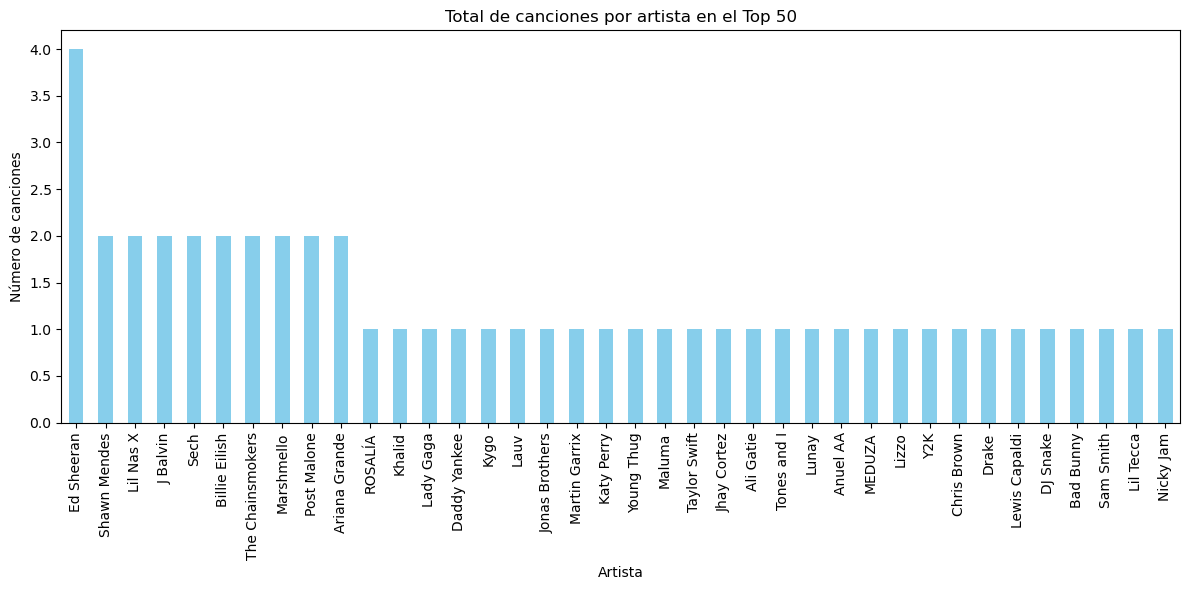

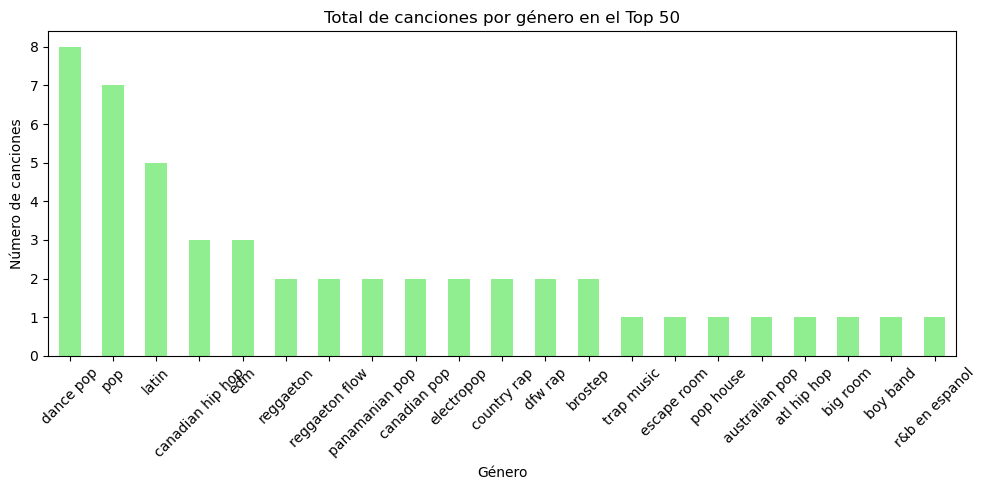

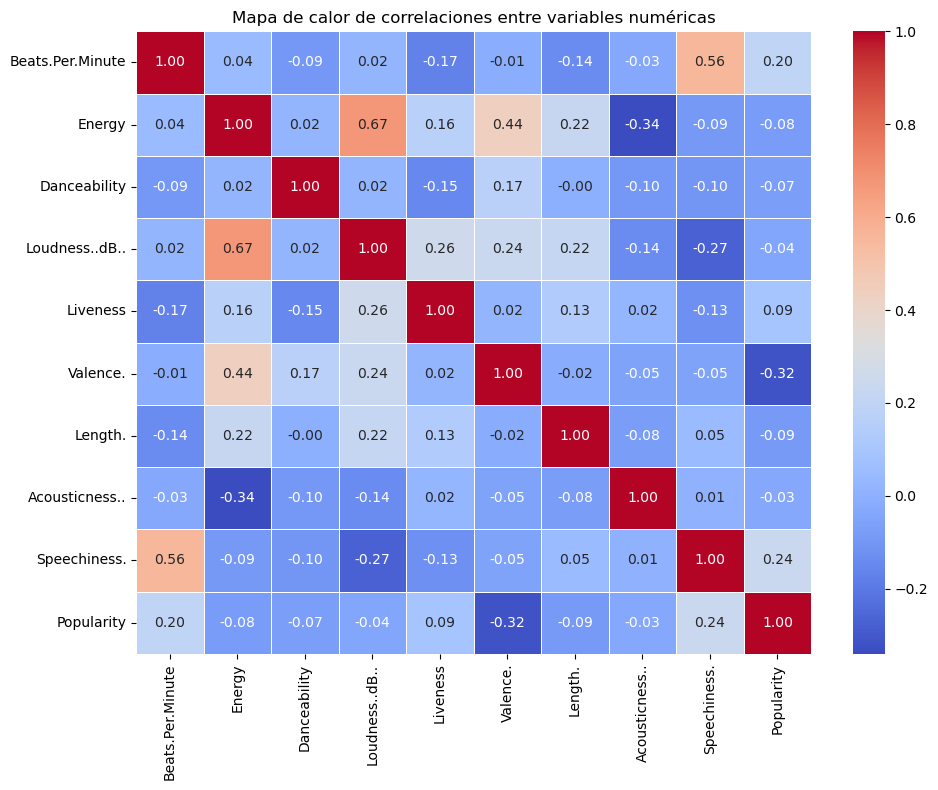

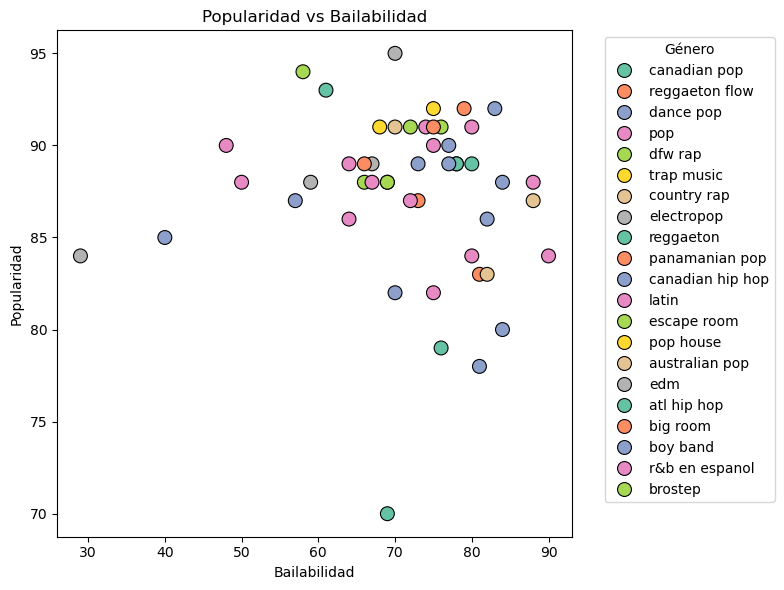

In [93]:
# Genera una gráfica de barras con el total de canciones por artista
plt.figure(figsize=(12, 6))
dfCopy['Artist.Name'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Total de canciones por artista en el Top 50')
plt.xlabel('Artista')
plt.ylabel('Número de canciones')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
# Genera una gráfica de barras con el total de canciones por género
plt.figure(figsize=(10, 5))
dfCopy['Genre'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Total de canciones por género en el Top 50')
plt.xlabel('Género')
plt.ylabel('Número de canciones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Genera un mapa de calor con la correlación entre columnas numéricas
plt.figure(figsize=(10, 8))
correlation_matrix = dfCopy.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de calor de correlaciones entre variables numéricas')
plt.tight_layout()
plt.show()
# Genera un gráfico de dispersión (scatter) de  Popularidad vs Bailabilidad
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dfCopy, x='Danceability', y='Popularity', hue='Genre', palette='Set2', s=100, edgecolor='black')
plt.title('Popularidad vs Bailabilidad')
plt.xlabel('Bailabilidad')
plt.ylabel('Popularidad')
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Nota importante

In [ ]:
# Si tienes problemas al cargar el archivo por codificación, intenta usar:
# pd.read_csv('top50.csv', encoding='latin-1')